# Python programming:
## Conditional Plots

In this notebook, we will explore seaborn visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. We will work on a new Titanic dataset compiled by Kaggle.

## Overview

The data has been split into two groups:

1. train.csv: Contains data on 712 passengers
2. test.csv: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in test.csv, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in train.csv:

•	PassengerId -- A numerical id assigned to each passenger.

•	Survived -- Whether the passenger survived (1), or didn't (0).

•	Pclass -- The class the passenger was in.

•	Name -- the name of the passenger.

•	Sex -- The gender of the passenger -- male or female.

•	Age -- The age of the passenger. Fractional.

•	SibSp -- The number of siblings and spouses the passenger had on board.

•	Parch -- The number of parents and children the passenger had on board.

•	Ticket -- The ticket number of the passenger.

•	Fare -- How much the passenger paid for the ticker.

•	Cabin -- Which cabin the passenger was in.

•	Embarked -- Where the passenger boarded the Titanic.


In [11]:
# Read train data and drop null rows
import pandas as pd
titanic = pd.read_csv("conditional plots\\train.csv")
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna();
print(titanic.head());

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


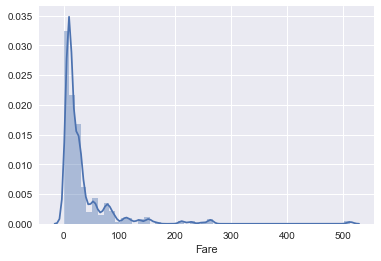

In [13]:
# generate a histogram and kernel density plot of the Fare column using the seaborn.distplot() function
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(titanic['Fare'])
plt.show()

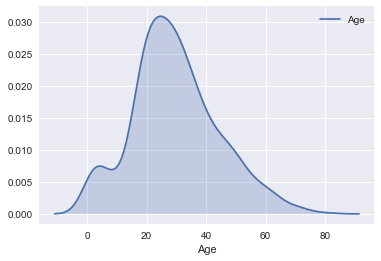

In [18]:
# generate jut the kernel density plot of the Age column using the seaborn.kdeplot() function
sns.kdeplot(titanic['Age'],shade=True)
plt.xlabel("Age")
plt.show()

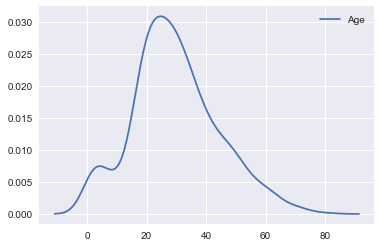

In [22]:
# Change the default seaborn style sheet
sns.set_style("darkgrid")
sns.kdeplot(titanic["Age"])

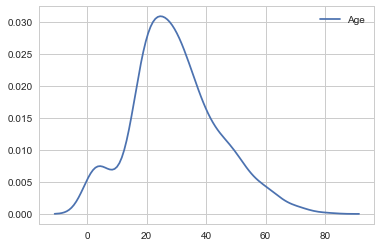

In [23]:
# Change the default seaborn style sheet
sns.set_style("whitegrid")
sns.kdeplot(titanic["Age"])

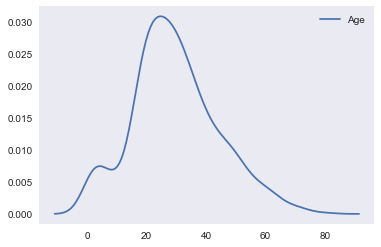

In [24]:
# Change the default seaborn style sheet
sns.set_style("dark")
sns.kdeplot(titanic["Age"])

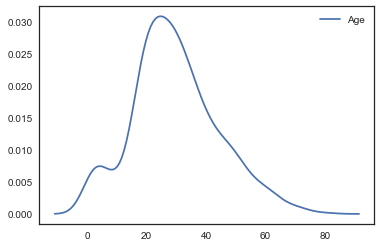

In [25]:
# Change the default seaborn style sheet
sns.set_style("white")
sns.kdeplot(titanic["Age"])

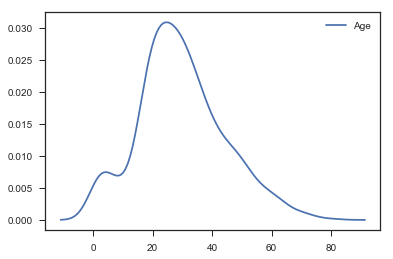

In [26]:
# Change the default seaborn style sheet
sns.set_style("ticks")
sns.kdeplot(titanic["Age"])

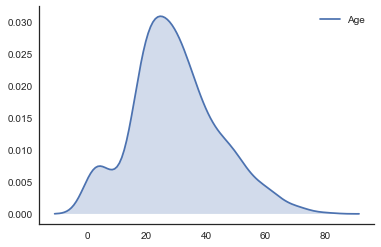

In [31]:
#  remove the axis spines for the top and right axes using seaborn.despine() function
sns.set_style("white")
sns.kdeplot(titanic["Age"],shade=True);
sns.despine();

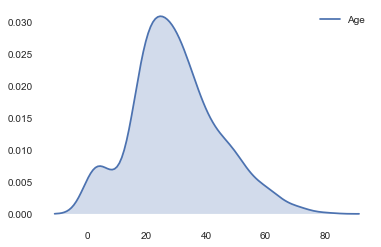

In [32]:
#  By default, only the top and right axes will be despined.
# To despine the other two axes, we need to set the left and bottom parameters to True.
sns.set_style("white")
sns.kdeplot(titanic["Age"],shade=True);
sns.despine(left=True, bottom=True);

## Conditional Distributions Using A Single Condition

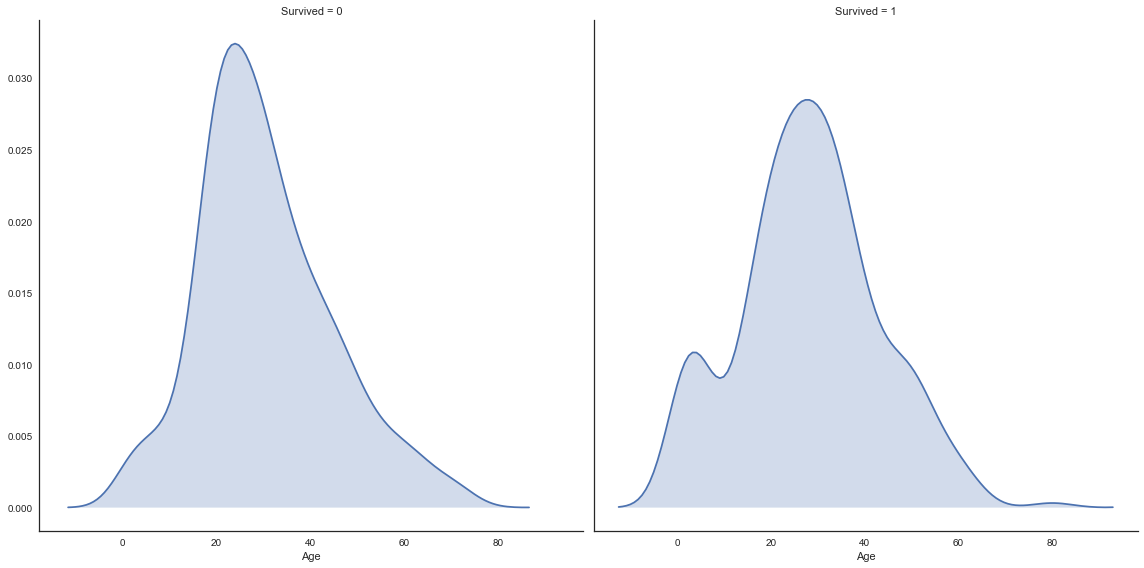

In [34]:
# create a small multiple by specifying the conditioning criteria and the type of data visualization we want
# visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots

ageplots = sns.FacetGrid(titanic,col='Survived', size=8)
ageplots.map(sns.kdeplot,'Age',shade=True);

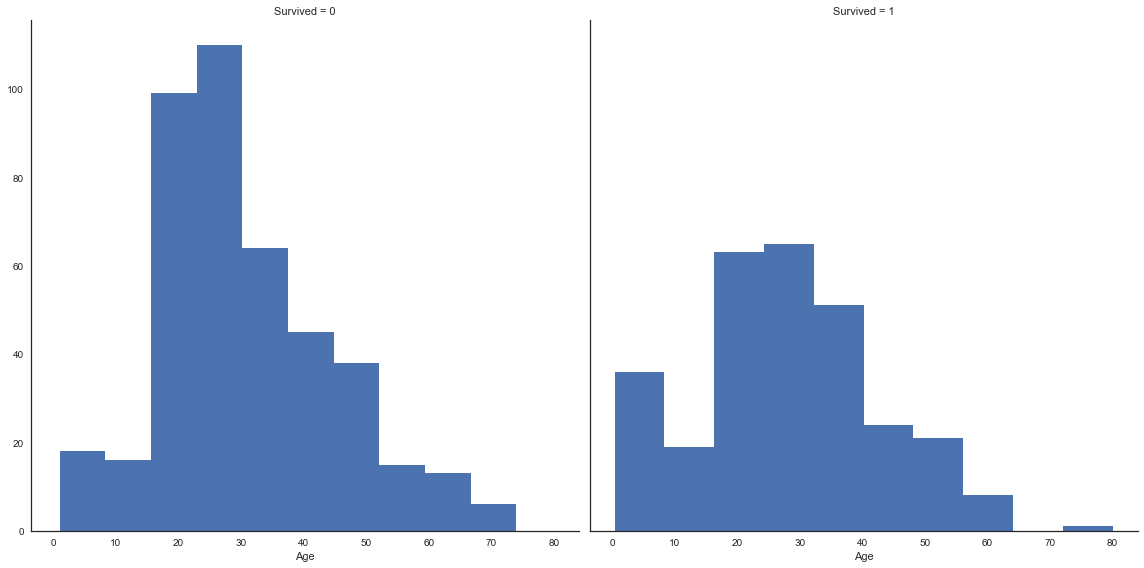

In [36]:
# similarly we can map histograms
ageplots = sns.FacetGrid(titanic,col='Survived', size=8)
ageplots.map(plt.hist,'Age');

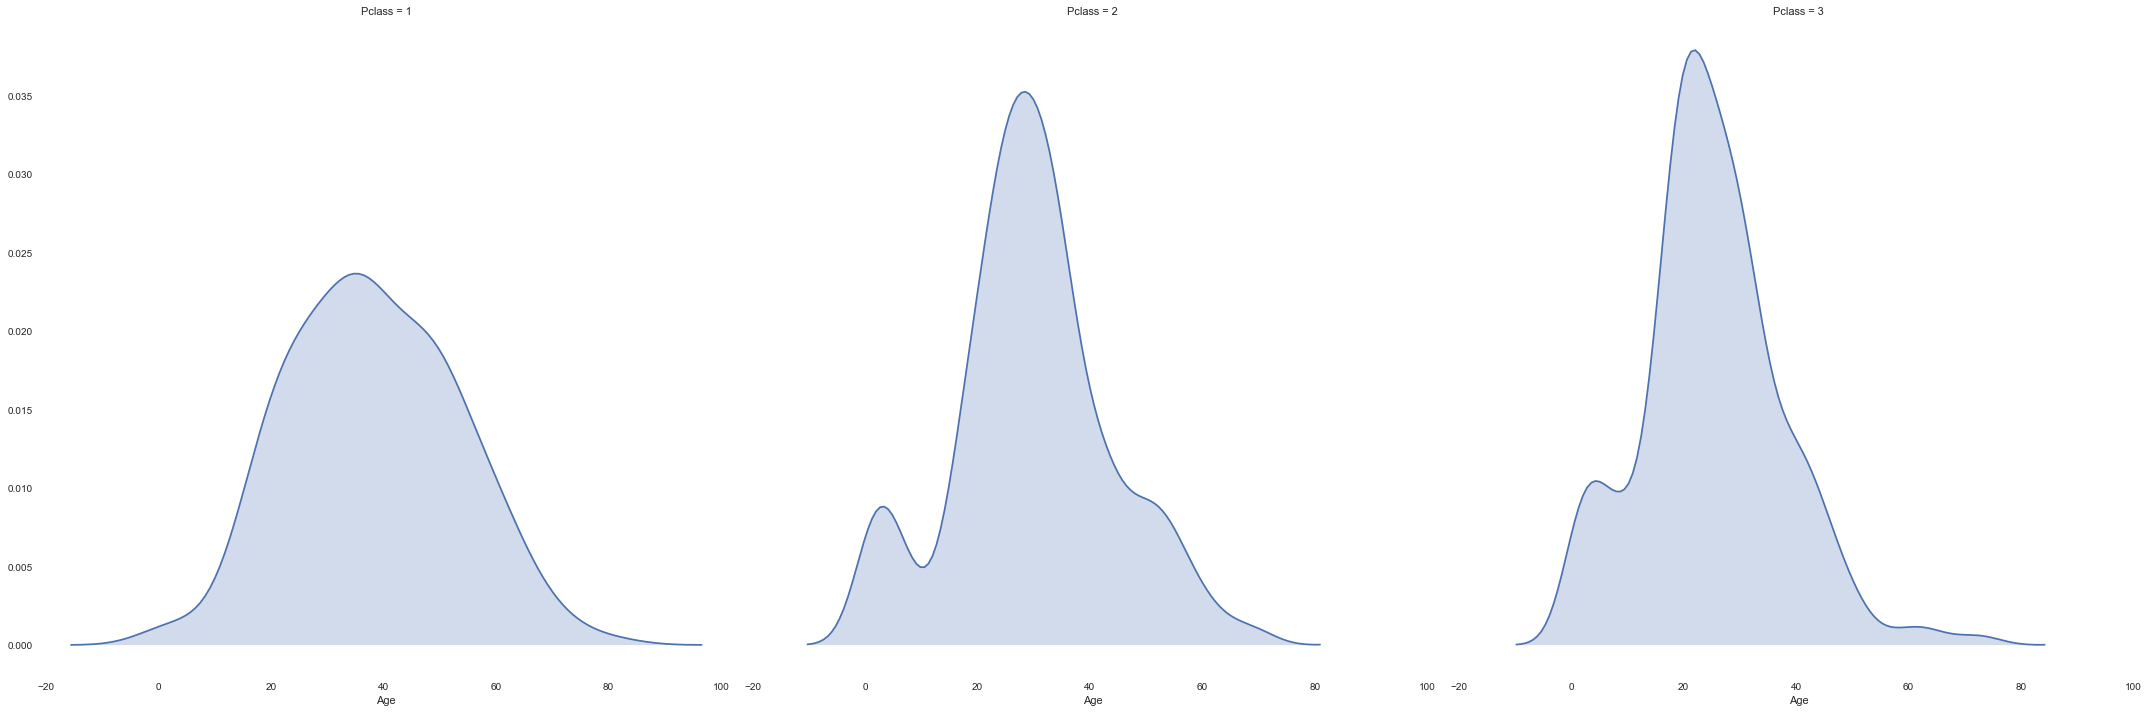

In [39]:
#visualize the differences in age distributions between passengers
ageplots = sns.FacetGrid(titanic,col='Pclass',size=10)
ageplots.map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True, bottom=True)


## Conditional Distributions Using  two Conditions

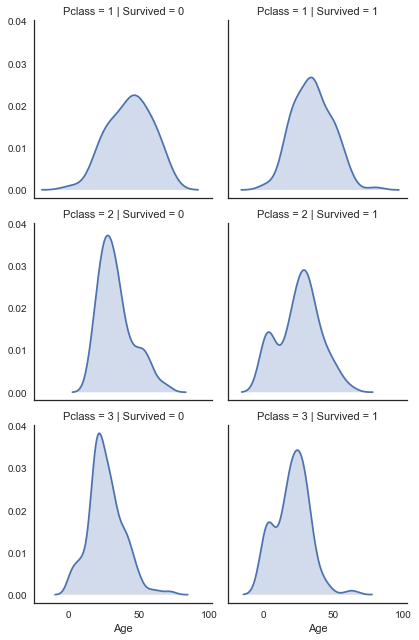

In [42]:
#using two conditions and visualize the differences in age distributions between passengers wo survived and the class they belong

ageplots = sns.FacetGrid(titanic,col='Survived',row='Pclass')
ageplots.map(sns.kdeplot,'Age',shade=True);

## Conditional Distributions Using three conditions

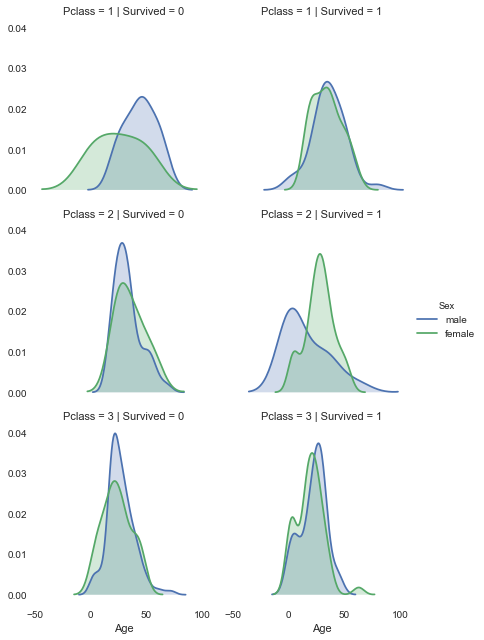

In [54]:
ageplots = sns.FacetGrid(titanic,col='Survived',row='Pclass',hue='Sex',size=3)
ageplots.map(sns.kdeplot,'Age',shade=True);
sns.despine(left=True, bottom=True)
ageplots.add_legend()
plt.show();